## Load Libraries and data

In [1]:
import os

# Print the current working directory
print("Current working directory: {0}".format(os.getcwd()))

os.chdir("../")

print("Current working directory: {0}".format(os.getcwd()))

Current working directory: /Users/magdalenakortas/Desktop/magda-ds-onboarding/anomaly_detection/other_research
Current working directory: /Users/magdalenakortas/Desktop/magda-ds-onboarding/anomaly_detection


In [2]:
import numpy as np
import pandas as pd
import utils
from tensorflow import random

pd.set_option("display.max_rows", 800)
pd.set_option("display.max_columns", 500)
%matplotlib inline

In [3]:
RANDOM_SEED = 42
PATH = "data/processed/processed_NE016_10_data.csv"

np.random.seed(RANDOM_SEED)
random.set_seed(RANDOM_SEED)

df_train, df_val, df_test = utils.read_split_data(PATH)

## Model training and prediction

In [45]:
from sklearn import svm

model = svm.SVC()

In [46]:
train_X = df_train[utils.FEATURE_LIST]
train_y = df_train["targets"].values
test_X = df_test[utils.FEATURE_LIST]
test_y = df_test["targets"].values

In [47]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_X[utils.FEATURE_LIST] = scaler.fit_transform(train_X[utils.FEATURE_LIST])
test_X[utils.FEATURE_LIST] = scaler.transform(test_X[utils.FEATURE_LIST])

/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [48]:
model.fit(train_X, train_y)

SVC()

In [49]:
y_pred = model.predict(test_X)

# y_pred_prod = model.predict_proba(X_test, probability=True)
# y_pred_prod = [x[1] for x in y_pred_prod]

In [11]:
df_test["pred_temp"] = y_pred
df_test["pred+1"] = df_test.pred_temp.shift(1)
df_test["pred-1"] = df_test.pred_temp.shift(-1)
df_test["pred_temp"] = df_test.apply(lambda row: utils.add_anomalies_pred(row), axis=1)

In [12]:
for i in range(2):
    df_test["pred+1"] = df_test.pred_temp.shift(-121).rolling(122).max()
    df_test = df_test.fillna(df_test["pred_temp"])
    df_test["pred-1"] = df_test.pred_temp.rolling(122).max()
    df_test = df_test.fillna(df_test["pred_temp"])
    df_test["pred_temp"] = df_test.apply(
        lambda row: utils.add_anomalies_pred(row), axis=1
    )

## Model evaluation

Prediction binary_accuracy (mapped) = 95.37557083617658%
Prediction F-score (mapped) = 0.7469118069520253


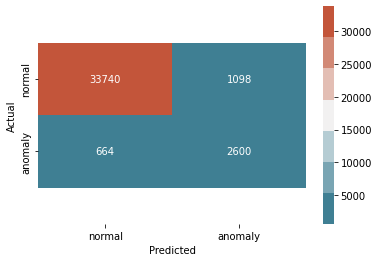


 Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.97      0.97     34838
           1       0.70      0.80      0.75      3264

    accuracy                           0.95     38102
   macro avg       0.84      0.88      0.86     38102
weighted avg       0.96      0.95      0.96     38102



(0.9537557083617658, 0.7469118069520253)

In [13]:
utils.show_metrics(df_test["pred_temp"], df_test["targets"])

In [40]:
df = pd.read_csv("data/processed/abi.csv")

In [42]:
X = df[utils.FEATURE_LIST]
y = df["targets"].values

X[utils.FEATURE_LIST] = scaler.transform(X[utils.FEATURE_LIST])

/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [43]:
yhat2 = model.predict(X)

In [44]:
yhat2.sum()

0

In [23]:
df["pred_temp"] = yhat2
df["pred+1"] = df.pred_temp.shift(1)
df["pred-1"] = df.pred_temp.shift(-1)
df["pred_temp"] = df.apply(lambda row: utils.add_anomalies_pred(row), axis=1)

In [24]:
for i in range(2):
    df["pred+1"] = df.pred_temp.shift(-121).rolling(122).max()
    df = df.fillna(df["pred_temp"])
    df["pred-1"] = df.pred_temp.rolling(122).max()
    df = df.fillna(df["pred_temp"])
    df["pred_temp"] = df.apply(lambda row: utils.add_anomalies_pred(row), axis=1)

Prediction binary_accuracy (mapped) = 91.53071850052066%
Prediction F-score (mapped) = 0.0


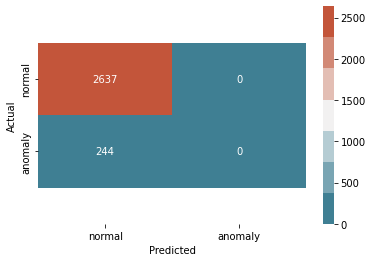


 Classification Report : 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96      2637
           1       0.00      0.00      0.00       244

    accuracy                           0.92      2881
   macro avg       0.46      0.50      0.48      2881
weighted avg       0.84      0.92      0.87      2881



/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/envs/tf2/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.9153071850052066, 0.0)

In [25]:
utils.show_metrics(df["pred_temp"], df["targets"])